# ANP Corpus

Before running this notebook, install the `tempo-embeddings` package in your local environment:

```bash
pip install .
```

See [README.dev.md](../README.dev.md) for more details.

In [1]:
%load_ext autoreload

## Load Model

In [2]:
MODEL_NAME = "DTAI-KULeuven/robbertje-1-gb-non-shuffled"  # NL MODEL TODO: is the model trained on lowercased data?


In [3]:
from tempo_embeddings.embeddings.model import RobertaModelWrapper

model = RobertaModelWrapper.from_pretrained(MODEL_NAME)

/Users/carstenschnober/Documents/SemanticsOfSustainability/workspace/tempo-embeddings/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at DTAI-KULeuven/robbertje-1-gb-non-shuffled were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a

## Load Data

The data needs to be downloaded and provided in the path configured in the next cell.

In [4]:
from pathlib import Path


DATA_DIR = Path.home() / "Documents" / "SemanticsOfSustainability" / "data" / "Joris"
assert DATA_DIR.is_dir()

In [5]:
ANP_DIR = DATA_DIR / "ANP" / "CleanFiles_perYear"
assert ANP_DIR.is_dir()


In [6]:
files = list(ANP_DIR.glob("ANP_????.csv.gz"))
files[:10]

[PosixPath('/Users/carstenschnober/Documents/SemanticsOfSustainability/data/Joris/ANP/CleanFiles_perYear/ANP_1952.csv.gz'),
 PosixPath('/Users/carstenschnober/Documents/SemanticsOfSustainability/data/Joris/ANP/CleanFiles_perYear/ANP_1940.csv.gz'),
 PosixPath('/Users/carstenschnober/Documents/SemanticsOfSustainability/data/Joris/ANP/CleanFiles_perYear/ANP_1976.csv.gz'),
 PosixPath('/Users/carstenschnober/Documents/SemanticsOfSustainability/data/Joris/ANP/CleanFiles_perYear/ANP_1968.csv.gz'),
 PosixPath('/Users/carstenschnober/Documents/SemanticsOfSustainability/data/Joris/ANP/CleanFiles_perYear/ANP_1964.csv.gz'),
 PosixPath('/Users/carstenschnober/Documents/SemanticsOfSustainability/data/Joris/ANP/CleanFiles_perYear/ANP_1942.csv.gz'),
 PosixPath('/Users/carstenschnober/Documents/SemanticsOfSustainability/data/Joris/ANP/CleanFiles_perYear/ANP_1950.csv.gz'),
 PosixPath('/Users/carstenschnober/Documents/SemanticsOfSustainability/data/Joris/ANP/CleanFiles_perYear/ANP_1978.csv.gz'),
 PosixPa

In [7]:
%autoreload now

import operator
from functools import reduce
from tqdm import tqdm
from tempo_embeddings.text.corpus import Corpus


corpus = reduce(
    operator.add,
    (
        Corpus.from_csv_file(
            path,
            model=model,
            text_columns=["content"],
            encoding="iso8859_15",
            compression="gzip",
            delimiter=";",
        )
        for path in tqdm(files, unit="file")
    ),
)

corpus

/Users/carstenschnober/Documents/SemanticsOfSustainability/workspace/tempo-embeddings/.venv/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/carstenschnober/Documents/SemanticsOfSustainability/workspace/tempo-embeddings/.venv/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour

Corpus(None, [Passage('Red.:  Datum:  veldman 1-1-52  Tijd: 13 ttt^.  Onderwerp: pan moen jom  De noordelijke onderhandelaars in Pan-Koen-Jom hebben vandaag Z^*^ ^ zullen j tocgoFcgd gegevens t^verstrekken ever de vijftig duizend  geallieerde krijgsgevangenen, die niet op de ingediende lijsten  voorkomen. Het g  : i\' ootste ^^^1 -.\'" - rt ren  L^A< ?-, ts^-aijn Zuidkoreanen.  De woordvoerder van de Verenigde Naties verklaarde, dat de  eerste bijeenkomst in het nieuwe jaar in een vriendschappelijke  sfeer is gehouden.  De commissie die sich bezig houdt met de vraagstukken betreffende-  de naleving van het bestand, heeft vandaag geen vorderingen  te.  gemaakt. De onderhandelingen worden morgen voortgezet.  Aan de fronten op Korea is het betrekkelijk rustig. XBMai De  gevechten beperken zich tot patrouilleactiviteit. Vliegtuigen van de Noordelijken hebben enkele bommen laten vallen op de  haven en het vliegveld van Seoul. De schade is gering  Bron: rtran  Regels: 13^', {'filename': 'anp

## Compute Embeddings

In [8]:
TERM = "duurzaam"

In [9]:
subcorpus = corpus.subcorpus(TERM, exact_match=False)

In [10]:
subcorpus.compute_embeddings()

## Read Stopwords

In [11]:
stopwords_file = (
    Path().absolute().parent / "tempo_embeddings" / "data" / "stopwords-filter-nl.txt"
)

with open(stopwords_file.absolute(), "rt") as f:
    stopwords = list(f.read().splitlines())

In [12]:
vectorizer = corpus.tfidf_vectorizer(stop_words=stopwords)

/Users/carstenschnober/Documents/SemanticsOfSustainability/workspace/tempo-embeddings/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## Visualize Embeddings

In [13]:
from tempo_embeddings.visualization.clusters import ClusterVisualizer

visualizer = ClusterVisualizer([subcorpus])

-------------------------------
duurzaam
0.24257197976112366 Passage("Red.  rom  Datum:  31 oct  Tijd: 13. 00  Onderwerp: Pella over Triest I  Premier Pella van Italie heeft vanlclnaod/dat  14  15.  een volksstemming in Triesykan leiden tot een definitieve oplossing van het geschil tussen Italie en Joego- allee( T de bewoners van  het omstreden gebiecf\\moeten deelnemen, /die daar al voor 1919  v/oondepi. Een internationale conferentie  Italiaanse premier Jalleen aÉHftot resultanten leiden/als het  /  hele vraagstuk-Triest M. n behandeling komt. \\Uant het geallieerde besluit/^É* zone A aan italie over te ara  heeft dit gebied\\tot( g_en duurzaam verworven bezit) van Italie 2amaaktLlBH evacuatie van de Brits-Amerikaanse tro  Italiaanse deskundig  is /%olgens premier Pella\\al op handen/en een toenemend aantal  de geallieerde autoriteiten pa* in het uitwerken van' de plannen \\oor het overdr;  ' agen van het  nie-i  bestuur!. \\Pella zei er niet aan te twijfelen/dat het besluit  twinï  

<Axes: xlabel='x', ylabel='y'>

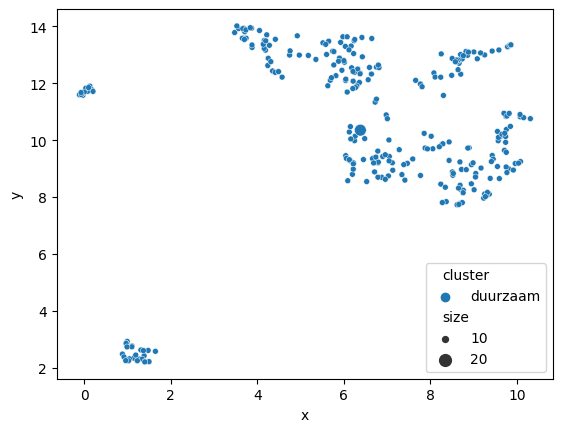

In [14]:
visualizer.visualize()

In [15]:
from bokeh.plotting import show

show(visualizer.interactive())

## Plotly

In [88]:
%autoreload now

from tempo_embeddings.visualization.plotly import PlotlyVisualizer

visualizer = PlotlyVisualizer(subcorpus)


In [89]:
visualizer.visualize(metadata_fields=["date", "filename"])

### Cluster

In [162]:
clusters = subcorpus.clusters(cluster_selection_method="leaf", min_samples=10)
clusters

[Corpus(5, [Passage('Red.: mallon :-:. raa. üx  Datum:  11-2-52  Tijd:  13 uur  ) nderwerp:  doviezencerj& îfic. Indon  to  13.  De Indonesische Minister van Financien, Wibisono, heeft  n  eegedeeld, dat de onlangs afgeschafte deviezencertificaten  \\  in 1951 3* éën-en-een-derde miljard gulden hebben opgebracht De opbrengst in 1952 onder de nieuwe regeling bedraagt  twee-derde miljard gulden. Daarbij moet nog worden opgeteld .^ \\, een-derde miljard voor nabetalingen de nog door de importeur moeten worden gedaan. Om de mindere opbrengst in 1952,( ten bedrage van een-derde miljard^goed te mak^% zal de Indone- sische regering een lening moeten sluiten bij de Javase Bank. De regering hoopt intussen, dat de uitvoer zal toenemen waardoor de deviezen-opbrengsten zullen stijgen. Minister Wibisono verklaarde verder nog,, dat het extra/uitvoerrecht  ^  / // ^  dat nu wordt geheven geen duurzaam  karakter  heeft en zal worden-  worden opgeheven ai 3 de tijd er rijp voor is. -  Bron: aneta  Rege

In [163]:
clusters[0].topic_words(vectorizer, n=5)

['duurzaam', 'echtscheiding', 'ontwerp', 'bestand', 'wetsontwerp']

In [164]:
for cluster in clusters:
    print("Passages: ", len(cluster.passages))
    cluster.set_topic_label(vectorizer, exclude_word=TERM, exact_match=False, n=2)
    print(cluster)

Passages:  36
Corpus('echtscheiding_ontwerp', [Passage('Red.: mallon :-:. raa. üx  Datum:  11-2-52  Tijd:  13 uur  ) nderwerp:  doviezencerj& îfic. Indon  to  13.  De Indonesische Minister van Financien, Wibisono, heeft  n  eegedeeld, dat de onlangs afgeschafte deviezencertificaten  \\  in 1951 3* éën-en-een-derde miljard gulden hebben opgebracht De opbrengst in 1952 onder de nieuwe regeling bedraagt  twee-derde miljard gulden. Daarbij moet nog worden opgeteld .^ \\, een-derde miljard voor nabetalingen de nog door de importeur moeten worden gedaan. Om de mindere opbrengst in 1952,( ten bedrage van een-derde miljard^goed te mak^% zal de Indone- sische regering een lening moeten sluiten bij de Javase Bank. De regering hoopt intussen, dat de uitvoer zal toenemen waardoor de deviezen-opbrengsten zullen stijgen. Minister Wibisono verklaarde verder nog,, dat het extra/uitvoerrecht  ^  / // ^  dat nu wordt geheven geen duurzaam  karakter  heeft en zal worden-  worden opgeheven ai 3 de tijd er

In [165]:
visualizer = ClusterVisualizer(clusters)

-------------------------------
echtscheiding_ontwerp
0.16953524947166443 Passage('Red:  Datum:  Tijd:  Onderwerp:  rmvrrntninhn-rp vom-r^n-DT-oM -roagRR-rde hierop mot de  oorden: een paar communisten hebben gupuugtl d*\'. trd<.\' hu  7.  Dertor:  10.  11.  12.  13.  14.  15.  K-lebs ergere, dan dat zij uit da aa  iRet systeem van de dictatuur s* sterk^/5<. ^^  i4*w D!rocs, maar  r-^/^^^< ?0^ ^-.  toch telkens  tijdeli;  scheuren en b rste^f^el^tijdelijk maar niet duurzaam kah men met een dictatuur volkeren in bedwang houden. De ziel en de geest, aldus doktor Drees kan aen niet doden." i ,,???---^__... _ - ^ y  y Drees spraK^^^âs& âïîè^ae wens uit dat de pelgrimstocht-  pelgrimstocht van Anna Kethly door de wereld ertoe zal leiden dat  de vrije volkeren zich bewust vorden van hun plicht tegen-  3ver de volkeren die n nog onderdrukt zijn. Moge het zo  zijn dat de Hongaars  *^*^\\  ir-rttr ^nn* Ki-jt-hlj/straks  t^aaghsse naar Hongar  ongarij^om daar in vTijn  eid te kunnen leven  samen

<Axes: xlabel='x', ylabel='y'>

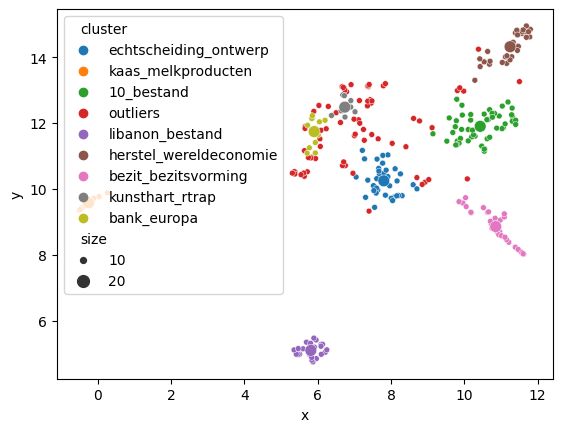

In [166]:
visualizer.visualize()

In [167]:
show(visualizer.interactive())

## Wizmap

In [52]:
from tempo_embeddings.visualization.wizmap import WizmapVisualizer

port = 8000

if "wizmap_visualizer" in locals():
    # Cleanup previous run
    wizmap_visualizer.cleanup()


wizmap_visualizer = WizmapVisualizer(subcorpus, title=TERM, stopwords=stopwords)

wizmap_visualizer.visualize(port=port)

Start generating data list...
Start generating contours...
Start generating multi-level summaries...


284it [00:00, 73029.39it/s]
100%|██████████| 6/6 [00:00<00:00, 15.74it/s]


Starting server on port 8000


127.0.0.1 - - [08/Aug/2023 17:09:50] "GET / HTTP/1.1" 404 -


<iframe
 srcdoc="<!DOCTYPE html><html lang="en"><head><meta charset="UTF-8" /><meta name="viewport" content="width=device-width, initial-scale=1.0" /><title>WizMap</title><style>html {font-size: 16px;-moz-osx-font-smoothing: grayscale;-webkit-font-smoothing: antialiased;text-rendering: optimizeLegibility;-webkit-text-size-adjust: 100%;-moz-text-size-adjust: 100%;scroll-behavior: smooth;}html, body {position: relative;width: 100%;height: 100%;overscroll-behavior: none;}body {margin: 0px;padding: 0px;box-sizing: border-box;font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Oxygen-Sans, Ubuntu, Cantarell, 'Helvetica Neue', sans-serif;color: hsl(0, 0%, 29%);font-size: 1em;font-weight: 400;line-height: 1.5;}*, ::after, ::before {box-sizing: inherit;}a {color: rgb(0, 100, 200);text-decoration: none;}a:hover {text-decoration: underline;}a:visited {color: rgb(0, 80, 160);}label {display: block;}input, select, textarea {font-family: inherit;font-size: inherit;-webkit-padding: 0 0;padding: 0;margin: 0 0 0 0;box-sizing: border-box;border: 1px solid #ccc;border-radius: 2px;}input:disabled {color: #ccc;}button {all: unset;outline: none;cursor: pointer;}</style><script defer src='data:text/javascript;base64,dmFyIHdpem1hcD1mdW5jdGlvbigpeyJ1c2Ugc3RyaWN0Ijt2YXIgSmY9T2JqZWN0LmRlZmluZVByb3BlcnR5O3ZhciBQZj0oZWksUSxhbik9PlEgaW4gZWk/SmYoZWksUSx7ZW51bWVyYWJsZTohMCxjb25maWd1cmFibGU6ITAsd3JpdGFibGU6ITAsdmFsdWU6YW59KTplaVtRXT1hbjt2YXIgbXQ9KGVpLFEsYW4pPT4oUGYoZWksdHlwZW9mIFEhPSJzeW1ib2wiP1ErIiI6USxhbiksYW4pO2Z1bmN0aW9uIGVpKCl7fWZ1bmN0aW9uIFEodCxsLGksZSxuKXt0Ll9fc3ZlbHRlX21ldGE9e2xvYzp7ZmlsZTpsLGxpbmU6aSxjb2x1bW46ZSxjaGFyOm59fX1mdW5jdGlvbiBhbih0KXtyZXR1cm4gdCgpfWZ1bmN0aW9uIGgwKCl7cmV0dXJuIE9iamVjdC5jcmVhdGUobnVsbCl9ZnVuY3Rpb24gb2UodCl7dC5mb3JFYWNoKGFuKX1mdW5jdGlvbiBwMCh0KXtyZXR1cm4gdHlwZW9mIHQ9PSJmdW5jdGlvbiJ9ZnVuY3Rpb24gYmQodCxsKXtyZXR1cm4gdCE9dD9sPT1sOnQhPT1sfHx0JiZ0eXBlb2YgdD09Im9iamVjdCJ8fHR5cGVvZiB0PT0iZnVuY3Rpb24ifWZ1bmN0aW9uIFlaKHQpe3JldHVybiBPYmplY3Qua2V5cyh0KS5sZW5ndGg9PT0wfWNvbnN0IHVjPXR5cGVvZiB3aW5kb3c8InUiP3dpbmRvdzp0eXBlb2YgZ2xvYmFsVGhpczwidSI/Z2xvYmFsVGhpczpnbG9iYWw7ZnVuY3Rpb24gWjAodCxsKXt0LmFwcGVuZENoaWxkKGwpfWZ1bmN0aW9uIFdvKHQsbCxpKXtjb25zdCBlPVJaKHQpO2lmKCFlLmdldEVsZW1lbnRCeUlkKGwpKXtjb25zdCBuPUQoInN0eWxlIik7bi5pZD1sLG4udGV4dENvbnRlbnQ9aSxIWihlLG4pfX1mdW5jdGlvbiBSWih0KXtpZighdClyZXR1cm4gZG9jdW1lbnQ7Y29uc3QgbD10LmdldFJvb3ROb2RlP3QuZ2V0Um9vdE5vZGUoKTp0Lm93bmVyRG9jdW1lbnQ7cmV0dXJuIGwmJmwuaG9zdD9sOnQub3duZXJEb2N1bWVudH1mdW5jdGlvbiBIWih0LGwpe3JldHVybiBaMCh0LmhlYWR8fHQsbCksbC5zaGVldH1mdW5jdGlvbiBUWih0LGwsaSl7dC5pbnNlcnRCZWZvcmUobCxpfHxudWxsKX1mdW5jdGlvbiBHMCh0KXt0LnBhcmVudE5vZGUmJnQucGFyZW50Tm9kZS5yZW1vdmVDaGlsZCh0KX1mdW5jdGlvbiBrWih0LGwpe2ZvcihsZXQgaT0wO2k8dC5sZW5ndGg7aSs9MSl0W2ldJiZ0W2ldLmQobCl9ZnVuY3Rpb24gRCh0KXtyZXR1cm4gZG9jdW1lbnQuY3JlYXRlRWxlbWVudCh0KX1mdW5jdGlvbiBjYyh0KXtyZXR1cm4gZG9jdW1lbnQuY3JlYXRlRWxlbWVudE5TKCJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIsdCl9ZnVuY3Rpb24gc2kodCl7cmV0dXJuIGRvY3VtZW50LmNyZWF0ZVRleHROb2RlKHQpfWZ1bmN0aW9uIE50KCl7cmV0dXJuIHNpKCIgIil9ZnVuY3Rpb24gd1oodCxsLGksZSl7cmV0dXJuIHQuYWRkRXZlbnRMaXN0ZW5lcihsLGksZSksKCk9PnQucmVtb3ZlRXZlbnRMaXN0ZW5lcihsLGksZSl9ZnVuY3Rpb24gTVoodCxsLGkpe2k9PW51bGw/dC5yZW1vdmVBdHRyaWJ1dGUobCk6dC5nZXRBdHRyaWJ1dGUobCkhPT1pJiZ0LnNldEF0dHJpYnV0ZShsLGkpfWZ1bmN0aW9uIHZaKHQpe3JldHVybiBBcnJheS5mcm9tKHQuY2hpbGROb2Rlcyl9ZnVuY3Rpb24gbWQodCxsKXt0LnZhbHVlPWw9PW51bGw/IiI6bH1mdW5jdGlvbiBtbCh0LGwsaSl7dC5jbGFzc0xpc3RbaT8iYWRkIjoicmVtb3ZlIl0obCl9ZnVuY3Rpb24gSloodCxsLHtidWJibGVzOmk9ITEsY2FuY2VsYWJsZTplPSExfT17fSl7Y29uc3Qgbj1kb2N1bWVudC5jcmVhdGVFdmVudCgiQ3VzdG9tRXZlbnQiKTtyZXR1cm4gbi5pbml0Q3VzdG9tRXZlbnQodCxpLGUsbCksbn1sZXQgc3M7ZnVuY3Rpb24gb3ModCl7c3M9dH1mdW5jdGlvbiBQWigpe2lmKCFzcyl0aHJvdyBuZXcgRXJyb3IoIkZ1bmN0aW9uIGNhbGxlZCBvdXRzaWRlIGNvbXBvbmVudCBpbml0aWFsaXphdGlvbiIpO3JldHVybiBzc31mdW5jdGlvbiByZCh0KXtQWigpLiQkLm9uX21vdW50LnB1c2godCl9Y29uc3QgaGQ9W10sYm49W107bGV0IHBkPVtdO2NvbnN0IFgwPVtdLE5aPVByb21pc2UucmVzb2x2ZSgpO2xldCBhYz0hMTtmdW5jdGlvbiB6Wigpe2FjfHwoYWM9ITAsTloudGhlbih5MCkpfWZ1bmN0aW9uIGJjKHQpe3

127.0.0.1 - - [08/Aug/2023 17:09:50] "GET /data.ndjson HTTP/1.1" 200 -


In [51]:
if False:
    wizmap_visualizer.cleanup()